In [ ]:
import sys, os
import importlib
os.path.dirname(sys.executable)
sys.path.append('/c4/home/sermare/fusioncharacterization_gliomas/')

from fcg.common_imports import *
from fcg import data_utils
from fcg import plots
from fcg import paths

pd.set_option('display.max_columns', None)

In [2]:
metadata = pd.read_csv('/c4/home/sermare/tables_fusion_characterization/60_patients_metadata.csv').drop_duplicates('file_path_x')
arriba38 = pd.read_csv('/c4/home/sermare/tables_fusion_characterization/60_patients_arriba_output.csv')
star38 = pd.read_csv('/c4/home/sermare/tables_fusion_characterization/60_patients_star_output.csv')

In [7]:
arriba38 = arriba38[arriba38['SF#'].isin(metadata['SF#'])]
star38 = star38[star38['SF#'].isin(metadata['SF#'])]

final_df = data_utils.get_final_df(arriba38, star38, metadata)
final_df['fusion_genes'] = final_df['fg_bk'].str.split('_', expand = True)[0]

In [5]:
gtex_fusions = pd.read_csv(paths.GTEX_FUSIONS_OLD, ',' , header = 0)
gtex_fusions['fusion_gene'] = gtex_fusions['fusion_name'].str.replace('::','/')

/scratch/sermare/ipykernel_2898797/2786097209.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  gtex_fusions = pd.read_csv(paths.GTEX_FUSIONS_OLD, ',' , header = 0)


In [9]:
chromosome_sizes = pd.read_csv(paths.CYTOBAND_FILE, '\t', header = None, names = ['chrom', 'start', 'end','annot', 'gieStain'])
chromosome_sizes = chromosome_sizes[chromosome_sizes['annot'].notna()]

/scratch/sermare/ipykernel_2898797/3089260568.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  chromosome_sizes = pd.read_csv(paths.CYTOBAND_FILE, '\t', header = None, names = ['chrom', 'start', 'end','annot', 'gieStain'])


In [8]:
final_df['GTEX'] = final_df['fusion_genes'].isin(gtex_fusions['fusion_gene'])

In [ ]:
importlib.reload(plots)

neg_entries = final_df[
    (final_df['GTEX'] == True) &
    (final_df['arriba_hg38'] > 0 ) 
]

plots.plot_fusion_densities(neg_entries, chromosome_sizes, label = 'Arriba Fusions')

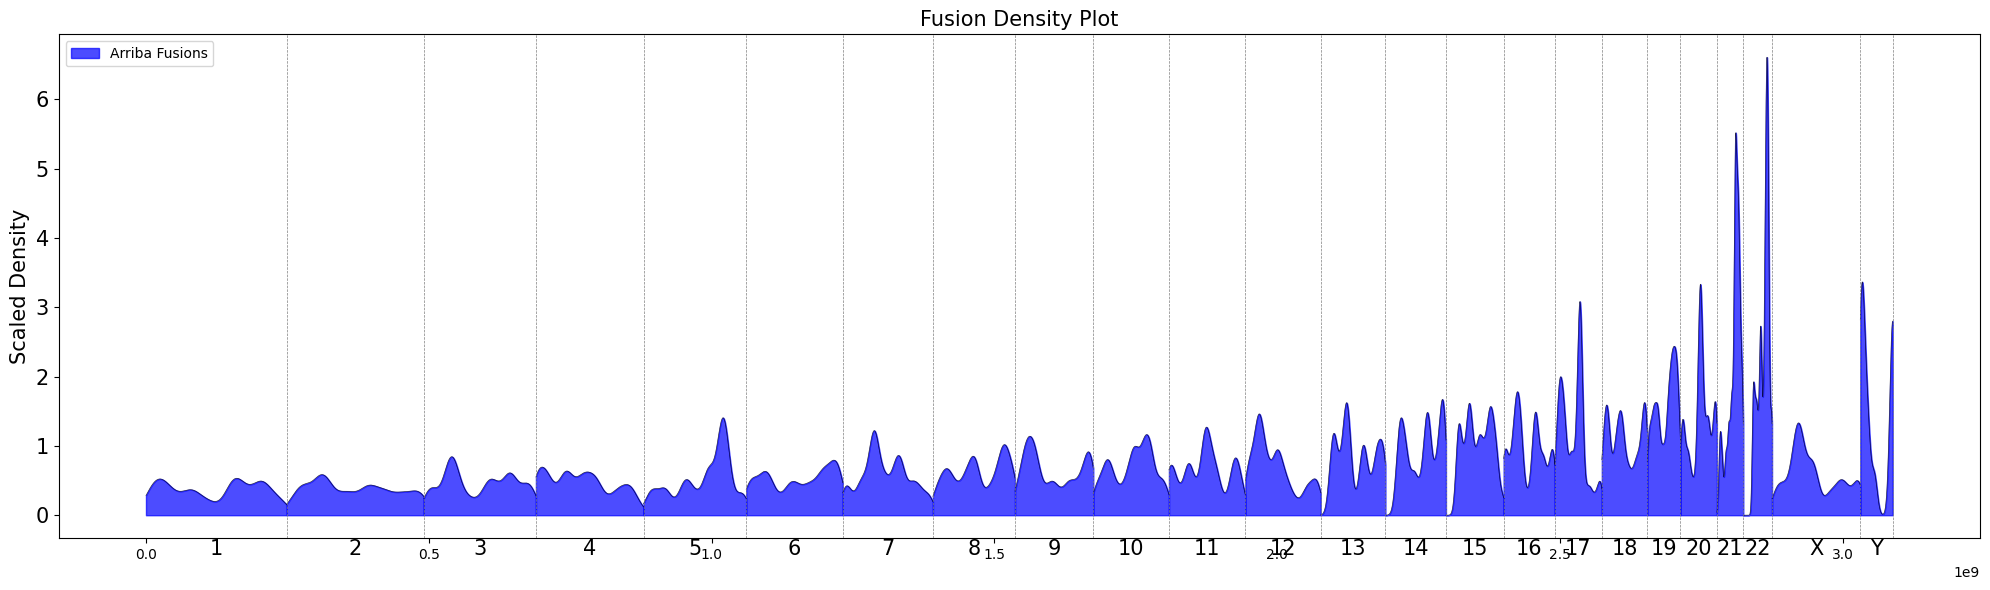

In [70]:
importlib.reload(plots)

neg_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['arriba_hg38'] > 0 ) 
]

plots.plot_fusion_densities(neg_entries, chromosome_sizes, label = 'Arriba Fusions')

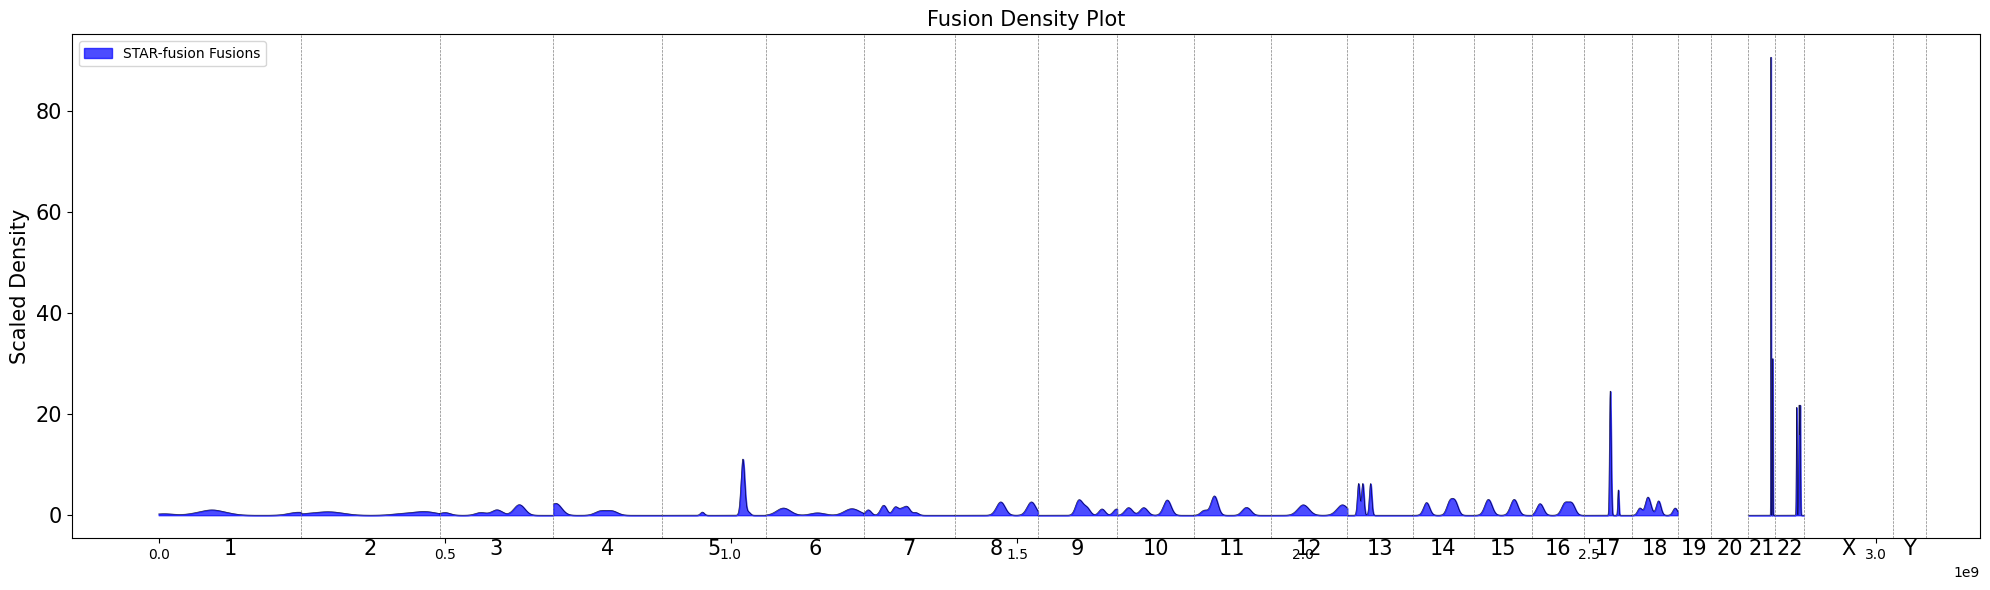

In [68]:
neg_entries = final_df[
    (final_df['GTEX'] == True) &
    (final_df['star_hg38'] > 0 ) 
]

plots.plot_fusion_densities(neg_entries, chromosome_sizes, label = 'STAR-fusion Fusions')

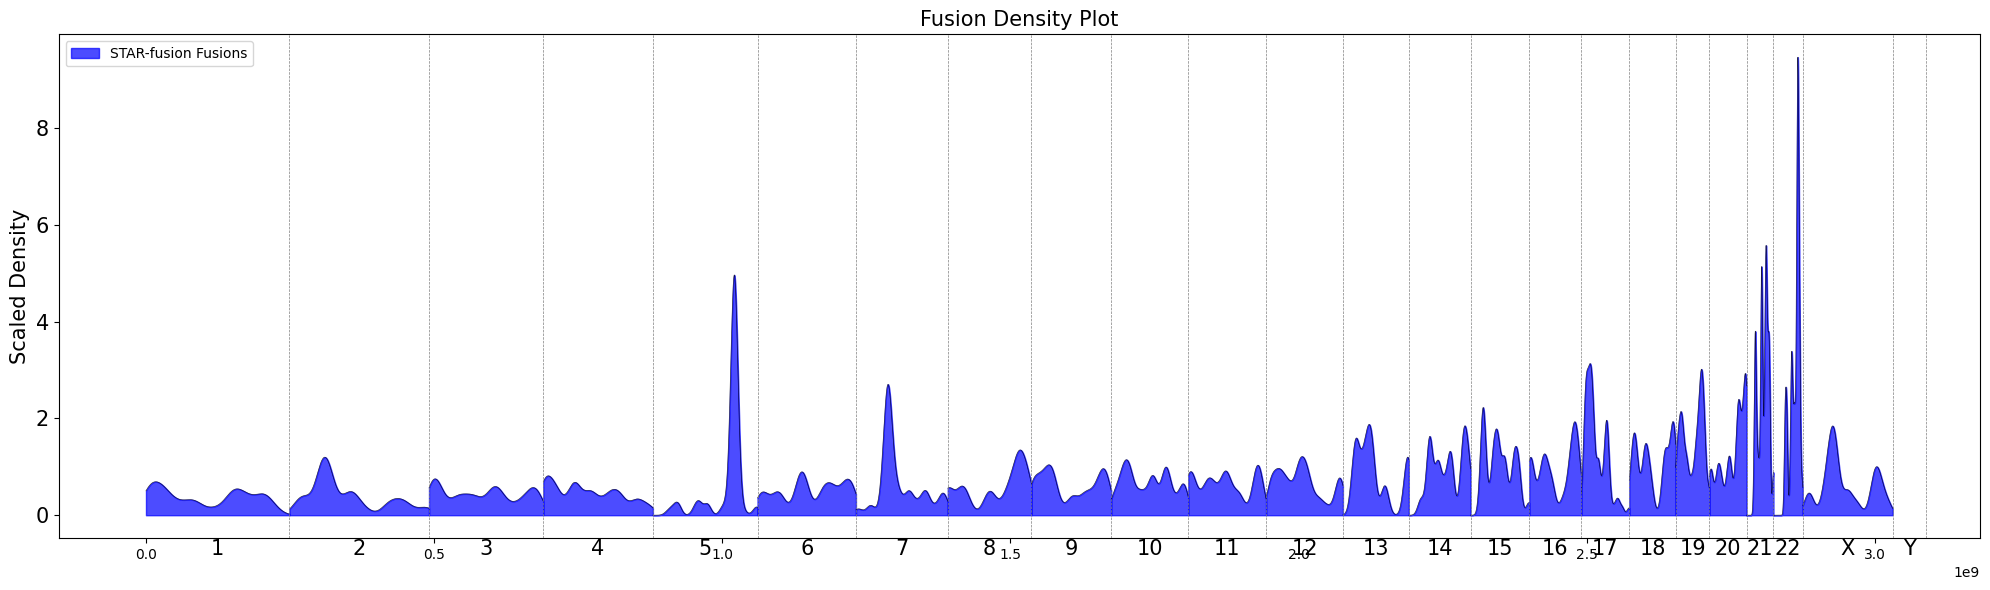

In [69]:
neg_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['star_hg38'] > 0 ) 
]

plots.plot_fusion_densities(neg_entries, chromosome_sizes, label = 'STAR-fusion Fusions')